In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Load

In [7]:
train = pd.read_csv('train.csv')
train

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


### 데이터 수

In [19]:
len(train)

9324

### 데이터셋 칼럼

In [12]:
train.columns

Index(['id', 'source', 'sentence_1', 'sentence_2', 'label', 'binary-label'], dtype='object')

### Sample

In [9]:
train.sample(100)

,id,source,sentence_1,sentence_2,label,binary-label
1540,boostcamp-sts-v1-train-1540,slack-rtt,조립할 때 좀 힘들었지만..,조립이 조금 어려웠지만..,3.2,1.0
7020,boostcamp-sts-v1-train-7020,petition-rtt,일들 안히실꺼면 세금이라도 적당히들 걷어가세요,일을 하지 않으려면 세금을 적당히 걷습니다.,3.4,1.0
7492,boostcamp-sts-v1-train-7492,nsmc-sampled,남상미 때매..평점올려야지..ㅡ.ㅡ,별점인데...ㅠ.ㅠ,0.4,0.0
9162,boostcamp-sts-v1-train-9162,slack-rtt,과일안주 우선 세팅갑니다 두쪽 나뉘어서,먼저 과일 안주를 세팅하겠습니다. 두 부분으로 나눕니다.,3.8,1.0
8513,boostcamp-sts-v1-train-8513,nsmc-rtt,누구한명이라도 따뜻하게안아주었더라면 그렇게되지않았을텐데 라는생각이 들고 피해자가 더...,"누군가를 따뜻하게 안아 주었다면 그런 일은 없었을 것이고, 피해자가 더 고통스러워할...",3.8,1.0
...,...,...,...,...,...,...
9144,boostcamp-sts-v1-train-9144,slack-rtt,매일 열일 해주시는 피플팀 덕분에 든든하고 감사합니다,하루하루 고생하는 피플팀 덕분에 든든하고 감사합니다,3.6,1.0
4141,boostcamp-sts-v1-train-4141,nsmc-sampled,"세기 ""레니 할린, 작품은 ""마인트헌터, 뿐인가!? 연출이 tv판 수준!","최종대사 ""짜이찌엔!"", ""빵!"" 정말 감동이었습니다.",0.0,0.0
2180,boostcamp-sts-v1-train-2180,petition-sampled,타투에 대한 법을 개정해주세요,정당방위에 대한 법률을 개정해주세요,0.6,0.0
2967,boostcamp-sts-v1-train-2967,nsmc-sampled,시즌 빨리 시작해 주세요!,빨리 끝냅시다 쫌!!!!,0.2,0.0


### Information

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB


### source(rtt 데이터셋과 sampled 데이터셋) 비교

1. rtt (Round-Trip Translation) 데이터셋

- **RTT**는 **Round-Trip Translation**의 약자로, 데이터셋의 문장들을 한 번 다른 언어(예: 영어)로 번역한 후 다시 한국어로 번역(Round-Trip)하여 만든 데이터셋을 의미한다. 이를 통해 기계 번역에서 발생할 수 있는 오류나 변형을 살펴보고, 데이터 증강(data augmentation) 또는 모델의 문장 복원 능력을 평가하는 데 사용될 수 있다.
- RTT 방식은 종종 데이터를 증강하거나 모델의 성능을 향상시키기 위해 사용되며, 원본과는 미묘하게 다른 표현의 데이터가 생성된다.

2. sampled 데이터셋

- **Sampled**는 말 그대로 **샘플링된 데이터**로, 데이터셋에서 일부만 추출하여 만든 하위 데이터셋를 의미한다.
- 이를 통해 데이터셋의 크기를 줄이고, 모델을 가볍게 테스트하거나, 빠른 실험을 위해 사용될 수 있다.

3. rtt 데이터셋과 sampled 데이터셋의 차이점

- **rtt**: Round-Trip Translation을 통해 번역되었다가 다시 원래 언어로 돌아온 데이터셋으로, 의미 변형이 있을 수 있어 데이터를 다양화하는 데 사용됨.
- **sampled**: 원본 데이터셋의 하위 샘플로, 원본 데이터의 일부만 포함되어 빠른 실험용이나 특정 목적에 맞출 수 있음.

In [60]:
# source 별 비율
source_counts = train['source'].value_counts()
source_percentages = train['source'].value_counts(normalize=True) * 100

source_df = pd.DataFrame({
    'Count': source_counts,
    'Percentage': source_percentages
})

source_df

,Count,Percentage
source,,
petition-sampled,2352,25.225225
nsmc-sampled,2296,24.624625
slack-sampled,2024,21.707422
slack-rtt,1047,11.229086
petition-rtt,817,8.762334
nsmc-rtt,788,8.451308


In [62]:
petition_count = source_df.loc[['petition-sampled', 'petition-rtt'], 'Count'].sum()
nsmc_count = source_df.loc[['nsmc-sampled', 'nsmc-rtt'], 'Count'].sum()
slack_count = source_df.loc[['slack-sampled', 'slack-rtt'], 'Count'].sum()

total_count = petition_count + nsmc_count + slack_count

summary_df = pd.DataFrame({
    'Category': ['Petition', 'NSMC', 'Slack'],
    'Count': [petition_count, nsmc_count, slack_count],
    'Percentage': [(petition_count / total_count) * 100, 
                   (nsmc_count / total_count) * 100, 
                   (slack_count / total_count) * 100]
})

summary_df

,Category,Count,Percentage
0,Petition,3169,33.987559
1,NSMC,3084,33.075933
2,Slack,3071,32.936508


## Label 별 counts

In [39]:
# 라벨 별 데이터 개수 확인
label_counts = train['label'].value_counts().sort_index().reset_index()
label_counts.columns = ['label', 'count']
label_counts

,label,count
0,0.0,2119
1,0.2,345
2,0.4,482
3,0.5,35
4,0.6,372
5,0.8,358
6,1.0,342
7,1.2,332
8,1.4,254
9,1.5,22


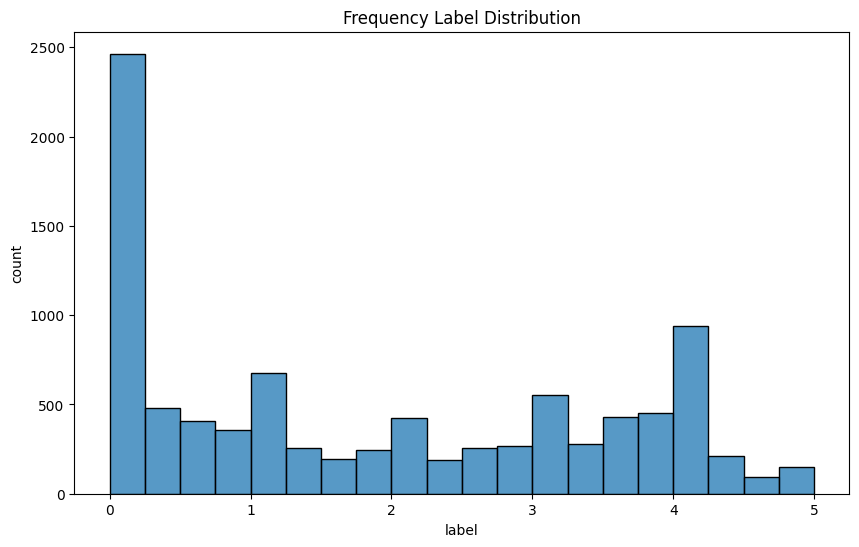

In [45]:
# label 별 데이터 개수 시각화
plt.figure(figsize=(10, 6))
sns.histplot(train['label'], bins=20)
plt.title("Frequency Label Distribution")
plt.xlabel("label")
plt.ylabel("count")
plt.show()

## 0.5 구간 당 counts

In [43]:
# 0.5 단위로 레이블 구간화 - 이상-미만[0.0, 0.5)

label_min = min(0, train['label'].min())  # 0 또는 최소값 중 작은 값
label_max = train['label'].max()
bins = np.arange(label_min, label_max, 0.5)
bins = np.append(bins, label_max)
labels = [f"[{i}, {i+0.5})" for i in bins[:-2]] + [f"[{bins[-2]}, {bins[-1]}]"]

label_counts = pd.cut(train['label'], bins=bins, labels=labels, right=False).value_counts().sort_index()
label_counts

label
[0.0, 0.5)    2946
[0.5, 1.0)     765
[1.0, 1.5)     928
[1.5, 2.0)     440
[2.0, 2.5)     613
[2.5, 3.0)     524
[3.0, 3.5)     832
[3.5, 4.0)     883
[4.0, 4.5)    1151
[4.5, 5.0]     151
Name: count, dtype: int64

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


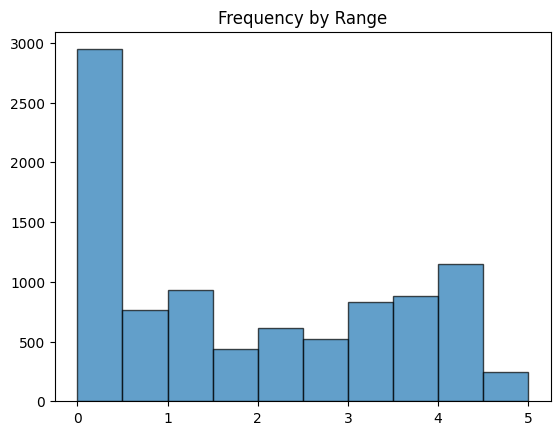

In [46]:
frequencies = list(train['label'].values)

# 히스토그램으로 빈도수 분포를 시각화 (bin 설정 가능)
bins = np.arange(1, max(frequencies) + 2, 0.5) - 1  # 빈도를 기준으로 bin을 설정
print(bins)
plt.hist(frequencies, bins=bins[:-1], edgecolor='black', alpha=0.7)

# 그래프 제목 및 축 라벨 설정
plt.title('Frequency by Range')

# 그래프 표시
plt.show()